# 시계열 분석

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv("환율.csv", engine = "python", parse_dates=["APPL_DATE"])
df.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


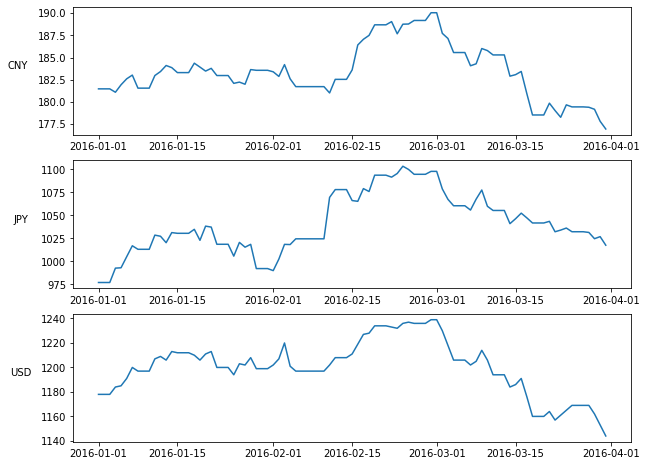

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

for (ax,idx,currency) in zip([ax1,ax2,ax3], [311,312,313], ['CNY','JPY','USD']):
    ax.plot("APPL_DATE", "STD_RATE", data = df[df["CURRENCY"]==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [4]:
df_CNY = df[df["CURRENCY"]=="CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

In [5]:
df_JPY = df[df["CURRENCY"]=="JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

In [6]:
df_USD = df[df["CURRENCY"]=="USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

In [7]:
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [8]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx)/len_idx)<train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [9]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print("shape of train data: {}".format(df_CNY_train.shape))
print("shape of test data: {}".format(df_CNY_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


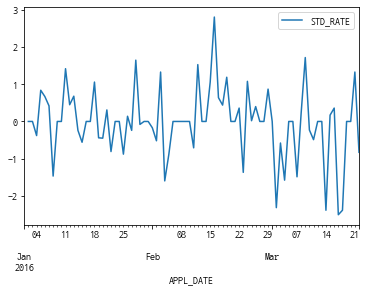

In [10]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

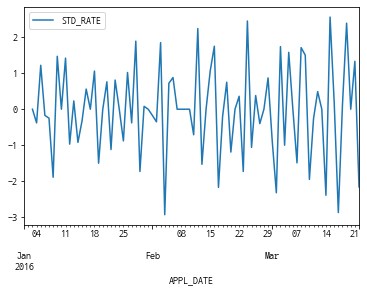

In [11]:
df_CNY_diff2 = df_CNY_train - 2*(df_CNY_train.shift(1)) + df_CNY_train.shift(2)
df_CNY_diff2.plot()

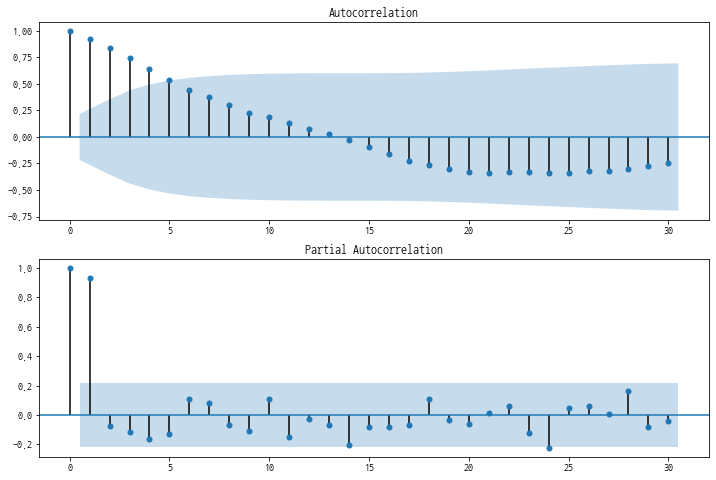

In [12]:
lag_size = 30
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax2)

In [13]:
ts_model_cny = ARIMA(df_CNY_train, order = (1,2,0))

ts_result_cny = ts_model_cny.fit(trend = "c", full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Fri, 07 Feb 2020   AIC                            253.025
Time:                        14:42:53   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


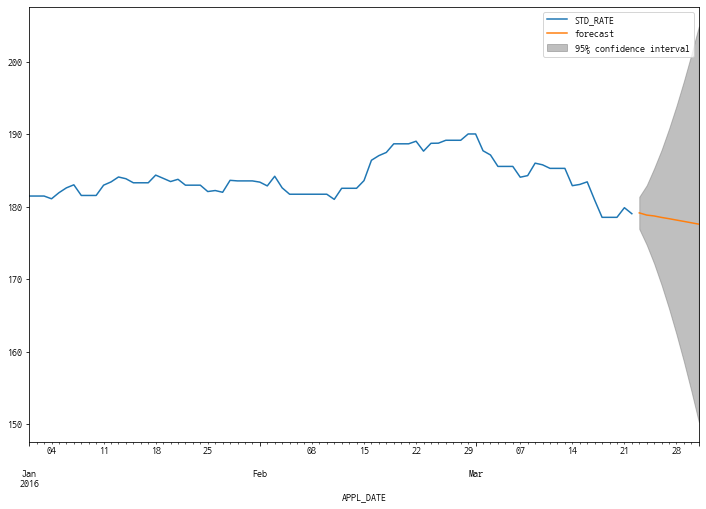

In [14]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig,ax = plt.subplots(figsize = (12,8))

ax = df_CNY_train.plot(ax=ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

In [15]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ='levels')
df_merge = df_CNY
df_merge['예측값'] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476898
2016-01-05,181.94,180.883667


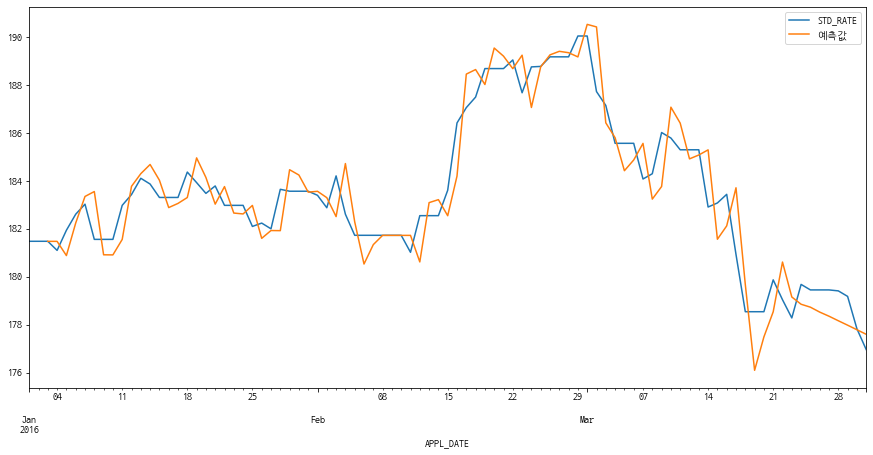

In [16]:
df_merge.plot(y=["STD_RATE","예측값"], figsize = (15,7))

### df_USD

In [17]:
df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [18]:
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
print("shape of train data: {}".format(df_USD_train.shape))
print("shape of test data: {}".format(df_USD_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


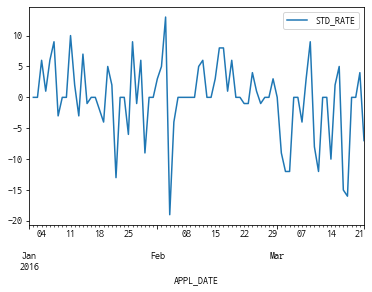

In [19]:
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

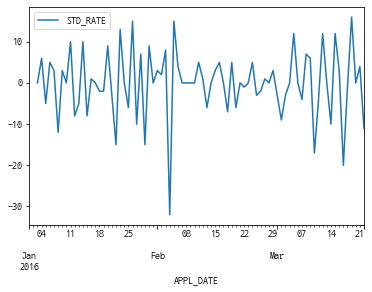

In [20]:
df_USD_diff2 = df_USD_train - 2*(df_USD_train.shift(1)) + df_USD_train.shift(2)
df_USD_diff2.plot()

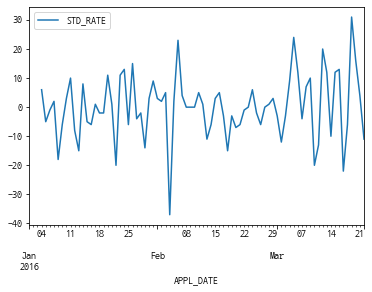

In [26]:
df_USD_diff3 = df_USD_train - 2*(df_USD_train.shift(1)) + df_USD_train.shift(3)
df_USD_diff3.plot()

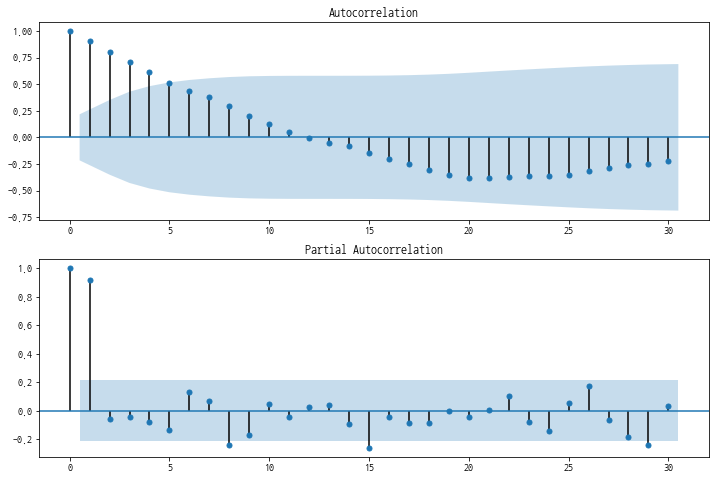

In [21]:
lag_size = 30
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train["STD_RATE"], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_USD_train["STD_RATE"], lags = lag_size, ax = ax2)

In [29]:
ts_model_usd = ARIMA(df_USD_train, order = (1,2,0))

ts_result_usd = ts_model_usd.fit(trend = "c", full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Fri, 07 Feb 2020   AIC                            253.025
Time:                        14:54:28   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


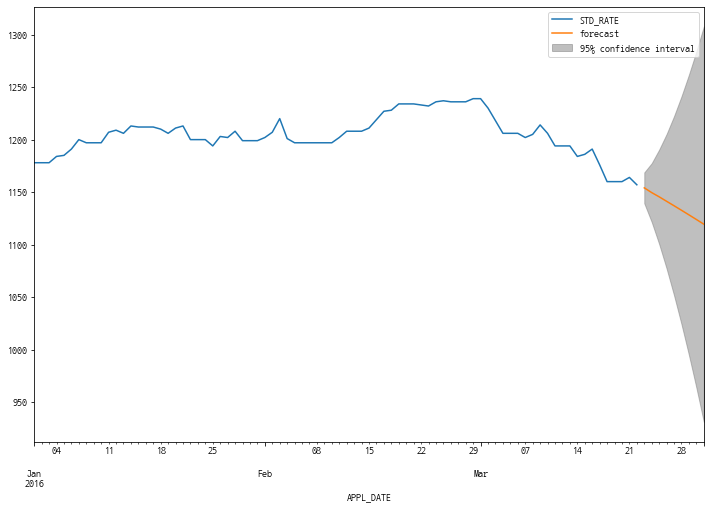

In [23]:
start_time = df_USD_test.index.min()
end_time = df_USD_test.index.max()
fig,ax = plt.subplots(figsize = (12,8))

ax = df_USD_train.plot(ax=ax)
fig = ts_result_usd.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

In [24]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_usd.predict(start = start_time, end = end_time, typ='levels')
df_merge = df_USD
df_merge['예측값'] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1177.949753
2016-01-04,1184.0,1177.930843
2016-01-05,1185.0,1187.672879


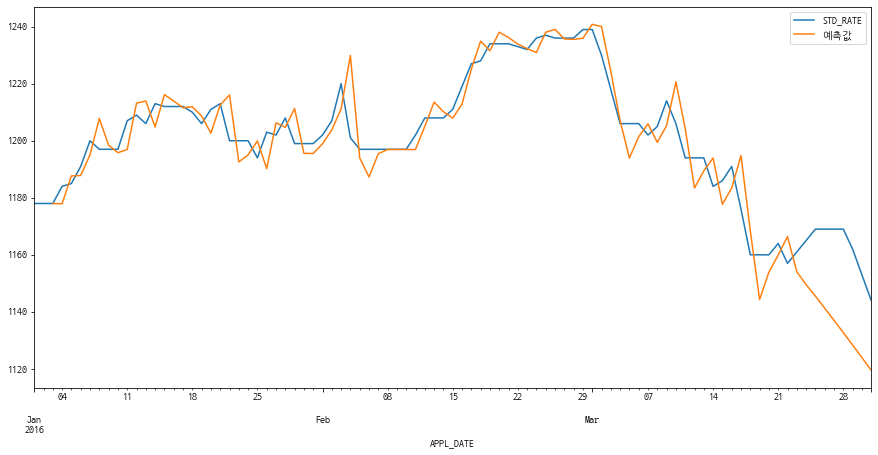

In [25]:
df_merge.plot(y=["STD_RATE","예측값"], figsize = (15,7))